In [1]:
import cv2
import os
import pandas as pd
import numpy as np
import tensorflow as tf 


In [2]:
mnist = tf.keras.datasets.mnist
(x_train,y_train),(x_test,y_test) = mnist.load_data()

In [25]:
x_train = tf.keras.utils.normalize(x_train)
x_test = tf.keras.utils.normalize(x_test)


10000

In [30]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(64,activation='relu'),
    tf.keras.layers.Dense(10,activation='softmax')
])

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

model.fit(x_train,y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 2s 839us/step - loss: 0.3603 - accuracy: 0.8978
Epoch 2/10
1875/1875 [==============================] - 2s 834us/step - loss: 0.1782 - accuracy: 0.9472
Epoch 3/10
1875/1875 [==============================] - 2s 831us/step - loss: 0.1315 - accuracy: 0.9615
Epoch 4/10
1875/1875 [==============================] - 2s 829us/step - loss: 0.1036 - accuracy: 0.9691
Epoch 5/10
1875/1875 [==============================] - 2s 833us/step - loss: 0.0837 - accuracy: 0.9753
Epoch 6/10
1875/1875 [==============================] - 2s 832us/step - loss: 0.0698 - accuracy: 0.9794
Epoch 7/10
1875/1875 [==============================] - 2s 831us/step - loss: 0.0591 - accuracy: 0.9824
Epoch 8/10
1875/1875 [==============================] - 2s 831us/step - loss: 0.0511 - accuracy: 0.9848
Epoch 9/10
1875/1875 [==============================] - 2s 833us/step - loss: 0.0446 - accuracy: 0.9869
Epoch 10/10
1875/1875 [==============================] - 2s 831u

In [31]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 0s 654us/step - loss: 0.0931 - accuracy: 0.9718


[0.09305161237716675, 0.9718000292778015]

In [32]:
import matplotlib.pyplot as plt

1/1 [==============================] - 0s 32ms/step
digit is 5


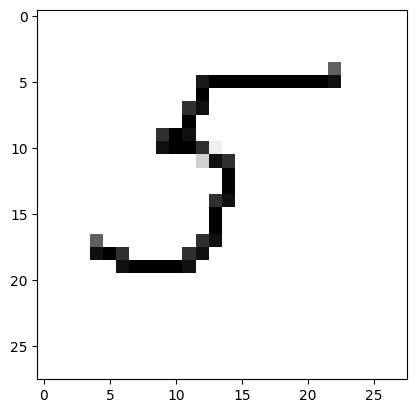

1/1 [==============================] - 0s 13ms/step
digit is 6


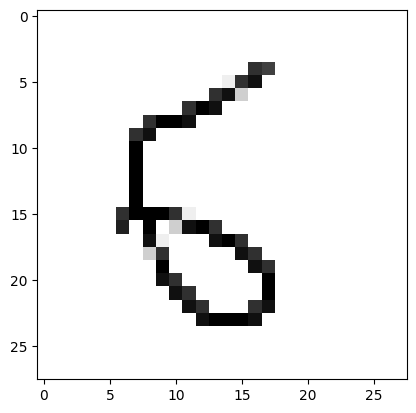

1/1 [==============================] - 0s 13ms/step
digit is 2


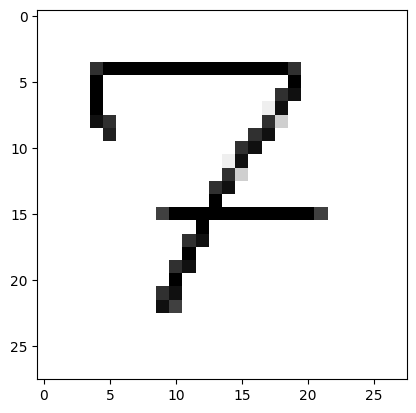

1/1 [==============================] - 0s 13ms/step
digit is 5


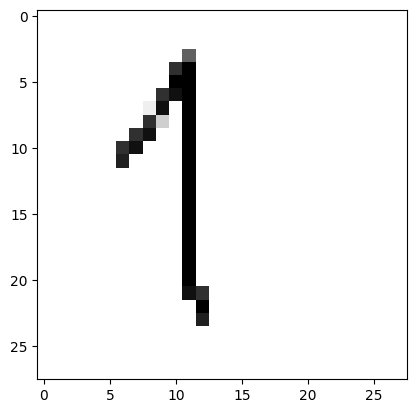

1/1 [==============================] - 0s 13ms/step
digit is 4


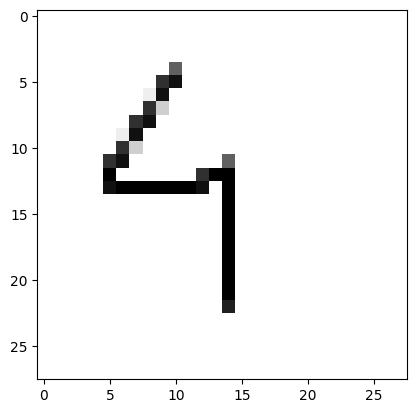

1/1 [==============================] - 0s 14ms/step
digit is 6


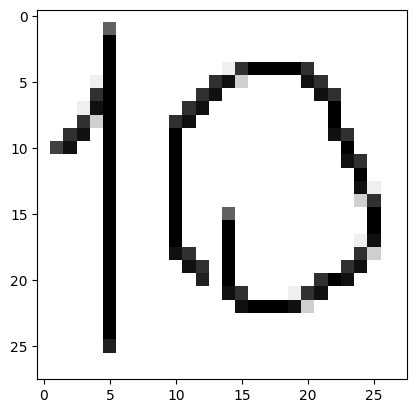

1/1 [==============================] - 0s 15ms/step
digit is 3


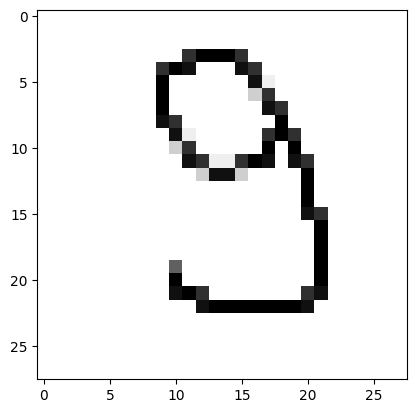

1/1 [==============================] - 0s 13ms/step
digit is 6


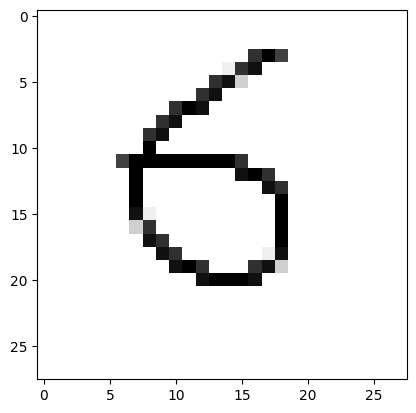

1/1 [==============================] - 0s 14ms/step
digit is 2


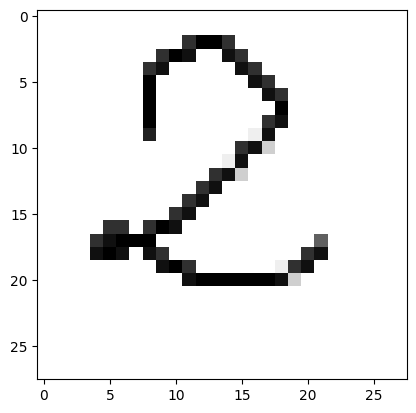

In [33]:
num = 1
while os.path.isfile(f'numbers/{num}.png'):
    img=cv2.imread(f'numbers/{num}.png')[:,:,0]
    img = np.invert(np.array([img]))
    pred = model.predict(img)
    print(f'digit is {np.argmax(pred)}')
    plt.imshow(img[0],cmap=plt.cm.binary)
    plt.show()
    num+=1